<a href="https://colab.research.google.com/github/alliwene/gb-november-grp2-health-insurance/blob/main/dhs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <center> <b> <big> ANALYSIS AND PREDICTION OF HEALTH INSURANCE SUBSCRIPTION IN NIGERIA </big> </b>
</center> 

  Robust health care plays a significant role in the survival and viability of the social and economic development of a country, especially in low and middle income nations where disease prevalence is highest. The National Health Insurance Scheme (NHIS) started operations in 2015, with the aim of providing all Nigerians with access to appropriate and affordable health care, but over 90% of the Nigerian population still has no health insurance coverage.

  Our project deals with predicting whether an individual would take up a health insurance policy or not giving different factors, such as age  groups, region, highest educational level, e.t.c., leveraging machine learning models. We would also investigate factors that most likely influence taking up a health policy using the trained ML model, this result would help insurance companies and public health stakeholders make smarter decisions on targeted ads to potential customers and improve health insurance penetration amongst the Nigerian populace. 


<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQk6MWvMt4EgDEKS4S6Y4z_HGlIYmUomW9Llg&usqp=CAU.png" width="480" height="240"/> </center>


Mount Goodgle drive to access data and load required libraries

In [2]:
# Mount Google Drive 
from google.colab import drive # import drive from google colab
import os, random 
ROOT = "/content/drive"     # default location for the drive
 
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# set file path
path = "/content/drive/MyDrive"
os.chdir(path)
!ls # list files in the path

 1-s2.0-S2352340918313520-mmc2.xlsx  'Colab Notebooks'	 NGIR7AFL.SAV


In [4]:
# install pyreadstat to read the spss file
!pip install pyreadstat --quiet 

     |████████████████████████████████| 2.5MB 9.0MB/s 


In [5]:
# import required libraries 

import pandas as pd
import numpy as np 
import pyreadstat
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data and Clean



Read in the data to a dataframe and get corresponding metadata

In [6]:
df, meta = pyreadstat.read_sav('NGIR7AFL.SAV')
df.head() 

,CASEID,V000,V001,V002,V003,V004,V005,V006,V007,V008,V008A,V009,V010,V011,V012,V013,V014,V015,V016,V017,V018,V019,V019A,V020,V021,V022,V023,V024,V025,V026,V027,V028,V029,V030,V031,V032,V034,V040,V042,V044,...,S434IE$3,S434IE$4,S434IE$5,S434IE$6,S434IF$1,S434IF$2,S434IF$3,S434IF$4,S434IF$5,S434IF$6,S434IG$1,S434IG$2,S434IG$3,S434IG$4,S434IG$5,S434IG$6,S434IX$1,S434IX$2,S434IX$3,S434IX$4,S434IX$5,S434IX$6,S434IZ$1,S434IZ$2,S434IZ$3,S434IZ$4,S434IZ$5,S434IZ$6,S434K$1,S434K$2,S434K$3,S434K$4,S434K$5,S434K$6,S434L$1,S434L$2,S434L$3,S434L$4,S434L$5,S434L$6
0,1 1 2,NG7,1.0,1.0,2.0,1.0,1335530.0,9.0,2018.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,1.0,2.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,706.0,NaN,701.0,NaN,NaN,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 6 4,NG7,1.0,6.0,4.0,1.0,1335530.0,9.0,2018.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,1.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,704.0,NaN,701.0,NaN,NaN,NaN,100.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 11 1,NG7,1.0,11.0,1.0,1.0,1335530.0,9.0,2018.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,1.0,2.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,704.0,NaN,701.0,NaN,NaN,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 25 2,NG7,1.0,25.0,2.0,1.0,1335530.0,9.0,2018.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,1.0,2.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,705.0,NaN,701.0,NaN,NaN,1.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 30 1,NG7,1.0,30.0,1.0,1.0,1335530.0,9.0,2018.0,1425.0,43345.0,5.0,1989.0,1073.0,29.0,3.0,1.0,1.0,2.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,705.0,NaN,701.0,NaN,NaN,NaN,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape 

(41821, 5394)

In [8]:
# check first 10 column labels from metadata
pprint(meta.column_labels[:10]) 

['Case Identification',
 'Country code and phase',
 'Cluster number',
 'Household number',
 "Respondent's line number",
 'Ultimate area unit',
 "Women's individual sample weight (6 decimals)",
 'Month of interview',
 'Year of interview',
 'Date of interview (CMC)']


In [9]:
# check if target column in column labels 
'Covered by health insurance' in meta.column_labels 

True

In [10]:
# get dictionary with column name as key and column label as value from metadata
# print first 10 items
labels_dict = meta.column_names_to_labels
pprint(list(labels_dict.items())[:10])  

[('CASEID', 'Case Identification'),
 ('V000', 'Country code and phase'),
 ('V001', 'Cluster number'),
 ('V002', 'Household number'),
 ('V003', "Respondent's line number"),
 ('V004', 'Ultimate area unit'),
 ('V005', "Women's individual sample weight (6 decimals)"),
 ('V006', 'Month of interview'),
 ('V007', 'Year of interview'),
 ('V008', 'Date of interview (CMC)')]


In [11]:
# get key from value in dict
print(list(labels_dict.keys())[list(labels_dict.values()).index(
    'Covered by health insurance')]) 

V481


In [12]:
# get variable names for column with categorical variables from metadata
# print first 5 items
variable_values = meta.variable_value_labels   
pprint(list(variable_values.items())[:5])

[('V013',
  {1.0: '15-19',
   2.0: '20-24',
   3.0: '25-29',
   4.0: '30-34',
   5.0: '35-39',
   6.0: '40-44',
   7.0: '45-49'}),
 ('V014',
  {1.0: 'Month and year - information complete',
   2.0: 'Month and age - year imputed',
   3.0: 'Year and age - month imputed',
   4.0: 'Year and age - year ignored',
   5.0: 'Year - age/month imputed',
   6.0: 'Age - year/month imputed',
   7.0: 'Month - age/year imputed',
   8.0: 'None - all imputed'}),
 ('V015',
  {1.0: 'Completed',
   2.0: 'Not at home',
   3.0: 'Postponed',
   4.0: 'Refused',
   5.0: 'Partially completed',
   6.0: 'Respondent incapacitated',
   7.0: 'Other'}),
 ('V018', {0.0: 'No calendar'}),
 ('V019', {0.0: 'No calendar'})]


In [13]:
# drop caseid column
df.drop('CASEID', axis=1, inplace=True)

Check and drop columns with one unique values, coulmns like this would be useless for a model

In [14]:
empty_unique = []
for col in df.columns:
  if len(df[col].unique()) == 1:
    empty_unique.append(col) 

print(len(empty_unique)) # print list len

2904


In [15]:
# drop the columns
df.drop(empty_unique, axis=1, inplace=True)
df.head() 

,V001,V002,V003,V004,V005,V006,V008,V008A,V009,V010,V011,V012,V013,V014,V016,V018,V019,V021,V022,V023,V024,V025,V027,V028,V030,V034,V040,V042,V044,V045A,V045B,V045C,V046,V101,V102,V104,V105,V105A,V106,V107,...,S430EL$3,S430EL$4,S430EL$5,S430EL$6,S430EX$1,S430EX$2,S430EX$3,S430EX$4,S430EX$5,S430EX$6,S430EZ$1,S430EZ$2,S430EZ$3,S430EZ$4,S430EZ$5,S430EZ$6,S430G$1,S430G$2,S430G$3,S430G$4,S430G$5,S430G$6,S433A$1,S433A$2,S433A$3,S433A$4,S434C$1,S434E$1,S434H$1,S434IA$1,S434IB$1,S434IC$1,S434ID$1,S434IE$1,S434IF$1,S434IG$1,S434IX$1,S434IZ$1,S434K$1,S434L$1
0,1.0,1.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,2.0,706.0,701.0,0.0,100.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,1.0,8.0,2.0,18.0,3.0,3.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,115.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,124.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,6.0,4.0,1.0,1335530.0,9.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,NaN,100.0,1.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,NaN,NaN,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,11.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,0.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,5.0,3.0,18.0,3.0,3.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,25.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,1.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,2.0,2.0,37.0,3.0,2.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,30.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1989.0,1073.0,29.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,NaN,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,NaN,NaN,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filter dataframe using columns with no null values. The dataframe columns are too much so we assume columns with any null value would not be useful.

In [16]:
df = df.loc[:, df.isna().sum() == 0]
df.head()

,V001,V002,V003,V004,V005,V006,V008,V008A,V009,V010,V011,V012,V013,V014,V016,V018,V019,V021,V022,V023,V024,V025,V027,V028,V030,V040,V042,V044,V045A,V045B,V045C,V046,V101,V102,V104,V106,V113,V115,V116,V119,...,VCAL$1,VCAL$2,MMC1,SSTATE,S653A,S653B,S653C,S653D,S653E,S653F,S653G,S653H,S653I,S653J,S653K,S653L,S653M,S653N,S653O,S653P,S653Q,S653R,S653S,S653T,S653U,S653V,S815E,S815F,S815G,S815H,S815I,S1108AB,S1108AC,S1108AD,S1108AF,S1108AI,S1108BA,S1108BC,S1108BD,S1108BF
0,1.0,1.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,2.0,706.0,701.0,100.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,1.0,8.0,3.0,14.0,10.0,11.0,1.0,...,0000000000000BPPPPPPPP0000000000000...,,4.0,180.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,6.0,4.0,1.0,1335530.0,9.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,1.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,92.0,996.0,12.0,1.0,...,00000000000000000000000000000000000...,,2.0,180.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,11.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,5.0,3.0,14.0,20.0,11.0,1.0,...,000000000BPPPPPPPP00000000000000000...,,5.0,180.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,25.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,2.0,3.0,51.0,996.0,11.0,1.0,...,LLLLLLLLLLLLLLLLLBPPPPPPPP000000000...,,4.0,180.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,30.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1989.0,1073.0,29.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,14.0,20.0,11.0,1.0,...,00000000000000000000000000000000000...,,2.0,180.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Check and drop columns with duplicate labels in dataframe. 

In [17]:
duplicate_list = []
for col in df.columns:
  if '$' in col:
    duplicate_list.append(col)
print(duplicate_list)

['V304$01', 'V304$02', 'V304$03', 'V304$05', 'V304$06', 'V304$07', 'V304$08', 'V304$09', 'V304$10', 'V304$11', 'V304$13', 'V304$14', 'V304$16', 'V304$17', 'V304$18', 'VCAL$1', 'VCAL$2']


In [18]:
# drop duplicate column labels 
df.drop(duplicate_list, axis=1, inplace=True)
df.head()

,V001,V002,V003,V004,V005,V006,V008,V008A,V009,V010,V011,V012,V013,V014,V016,V018,V019,V021,V022,V023,V024,V025,V027,V028,V030,V040,V042,V044,V045A,V045B,V045C,V046,V101,V102,V104,V106,V113,V115,V116,V119,...,V815B,V815C,MMC1,SSTATE,S653A,S653B,S653C,S653D,S653E,S653F,S653G,S653H,S653I,S653J,S653K,S653L,S653M,S653N,S653O,S653P,S653Q,S653R,S653S,S653T,S653U,S653V,S815E,S815F,S815G,S815H,S815I,S1108AB,S1108AC,S1108AD,S1108AF,S1108AI,S1108BA,S1108BC,S1108BD,S1108BF
0,1.0,1.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,2.0,706.0,701.0,100.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,1.0,8.0,3.0,14.0,10.0,11.0,1.0,...,0.0,0.0,4.0,180.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,6.0,4.0,1.0,1335530.0,9.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,1.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,92.0,996.0,12.0,1.0,...,0.0,0.0,2.0,180.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,11.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,5.0,3.0,14.0,20.0,11.0,1.0,...,0.0,0.0,5.0,180.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,25.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,2.0,3.0,51.0,996.0,11.0,1.0,...,0.0,0.0,4.0,180.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,30.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1989.0,1073.0,29.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,14.0,20.0,11.0,1.0,...,0.0,0.0,2.0,180.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


We make 2 different copies of the dataframe and different methods to drop coulumns for each copy.

Method 1: Create a filter with columns that has correlation >0.04 with target column, and use filter for the dataframe. Columns with decent correlation values with target may affect our predictions.

In [19]:
# set out target variable as a separate dataframe
target = pd.DataFrame(df['V481'])
target.head()

,V481
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [20]:
# make a copy of the dataframe
df1 = df.copy()

In [21]:
# drop target column from df1
df1.drop('V481', axis = 1, inplace = True)

In [22]:
# create a filter with columns that has correlation >0.04 with target column
filter = df1.apply(lambda x: target.corrwith(x).abs()) > 0.04
filter

,V001,V002,V003,V004,V005,V006,V008,V008A,V009,V010,V011,V012,V013,V014,V016,V018,V019,V021,V022,V023,V024,V025,V027,V028,V030,V040,V042,V044,V045A,V045B,V045C,V046,V101,V102,V104,V106,V113,V115,V116,V119,...,V815B,V815C,MMC1,SSTATE,S653A,S653B,S653C,S653D,S653E,S653F,S653G,S653H,S653I,S653J,S653K,S653L,S653M,S653N,S653O,S653P,S653Q,S653R,S653S,S653T,S653U,S653V,S815E,S815F,S815G,S815H,S815I,S1108AB,S1108AC,S1108AD,S1108AF,S1108AI,S1108BA,S1108BC,S1108BD,S1108BF
V481,False,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,True,False,False,False,False,False,False,True,False,False,False,False


In [23]:
# filter df1 with the filter
df1 = df1.loc[:, [x for x in filter.iloc[0]]]
df1.head()

,V008A,V010,V011,V012,V013,V025,V102,V104,V106,V115,V116,V119,V121,V122,V125,V127,V128,V133,V137,V140,V149,V155,V157,V158,V159,V169A,V170,V171A,V171B,V190,V191,V190A,V191A,V302A,V312,V313,V361,V364,V384A,V384B,V384C,V384D,V394,V467B,V467C,V467D,V467F,V481A,V481B,V481C,V481D,V481X,V525,V614,V785,S653F,S653I,S653J,S653N,S653Q,S653T,S815E,S815F,S815G,S1108AI
0,43345.0,1978.0,939.0,40.0,6.0,1.0,1.0,8.0,3.0,10.0,11.0,1.0,1.0,0.0,1.0,33.0,31.0,15.0,1.0,1.0,5.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,158617.0,5.0,115856.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,21.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,43344.0,2002.0,1230.0,16.0,1.0,1.0,1.0,95.0,2.0,996.0,12.0,1.0,1.0,1.0,1.0,33.0,34.0,10.0,0.0,1.0,3.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,3.0,5.0,187140.0,5.0,149135.0,0.0,0.0,0.0,4.0,3.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,43345.0,1981.0,977.0,37.0,5.0,1.0,1.0,5.0,3.0,20.0,11.0,1.0,1.0,1.0,1.0,35.0,31.0,15.0,2.0,1.0,5.0,2.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,5.0,171481.0,5.0,130865.0,1.0,0.0,0.0,3.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,43345.0,1990.0,1091.0,27.0,3.0,1.0,1.0,2.0,3.0,996.0,11.0,1.0,1.0,1.0,1.0,33.0,31.0,14.0,1.0,1.0,5.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,5.0,149597.0,5.0,105331.0,2.0,13.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,17.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,43345.0,1989.0,1073.0,29.0,3.0,1.0,1.0,95.0,2.0,20.0,11.0,1.0,1.0,0.0,0.0,35.0,31.0,12.0,0.0,1.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,5.0,105197.0,4.0,53526.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,17.0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [24]:
df1.shape

(41821, 65)

Change column labels to column names

In [25]:
df1.columns = df1.columns.map(labels_dict)
df1.head() 

,Date of interview Century Day Code (CDC),Respondent's year of birth,Date of birth (CMC),Respondent's current age,Age in 5-year groups,Type of place of residence,Type of place of residence,Years lived in place of residence,Highest educational level,Time to get to water source,Type of toilet facility,Household has: electricity,Household has: television,Household has: refrigerator,Household has: car/truck,Main floor material,Main wall material,Education in single years,Number of children 5 and under in household (de jure),De jure type of place of residence,Educational attainment,Literacy,Frequency of reading newspaper or magazine,Frequency of listening to radio,Frequency of watching television,Owns a mobile telephone,Has an account in a bank or other financial institution,Use of internet,Frequency of using internet last month,Wealth index combined,Wealth index factor score combined (5 decimals),Wealth index for urban/rural,Wealth index factor score for urban/rural (5 decimals),Ever used anything or tried to delay or avoid getting pregnant,Current contraceptive method,Current use by method type,Pattern of use,Contraceptive use and intention,Heard family planning on radio last few months,Heard family planning on TV last few months,Heard family planning in newspaper/magazine last few months,Heard family planning by text messages on mobile phone,Visited health facility last 12 months,Getting medical help for self: getting permission to go,Getting medical help for self: getting money needed for treatment,Getting medical help for self: distance to health facility,Getting medical help for self: not wanting to go alone,Health insurance type: mutual/community organization,Health insurance type: provided by employer,Health insurance type: social security,Health insurance type: private/commercially purchased,Health insurance type: other,Age at first sex,Ideal number of children (grouped),Heard about other STIs,Respondent ate: any other fruits,Respondent ate: any other types of meat or poultry,Respondent ate: any eggs,Respondent ate: any milk or milk products,Respondent ate: any other oils and fats,Respondent ate: sugar-sweetened beverages,Read/heard from social media,Read in a poster,Read in a leaflet or brochures,Malaria can be fully cured by medicine
0,43345.0,1978.0,939.0,40.0,6.0,1.0,1.0,8.0,3.0,10.0,11.0,1.0,1.0,0.0,1.0,33.0,31.0,15.0,1.0,1.0,5.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,158617.0,5.0,115856.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,21.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,43344.0,2002.0,1230.0,16.0,1.0,1.0,1.0,95.0,2.0,996.0,12.0,1.0,1.0,1.0,1.0,33.0,34.0,10.0,0.0,1.0,3.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,3.0,5.0,187140.0,5.0,149135.0,0.0,0.0,0.0,4.0,3.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,43345.0,1981.0,977.0,37.0,5.0,1.0,1.0,5.0,3.0,20.0,11.0,1.0,1.0,1.0,1.0,35.0,31.0,15.0,2.0,1.0,5.0,2.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,5.0,171481.0,5.0,130865.0,1.0,0.0,0.0,3.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,43345.0,1990.0,1091.0,27.0,3.0,1.0,1.0,2.0,3.0,996.0,11.0,1.0,1.0,1.0,1.0,33.0,31.0,14.0,1.0,1.0,5.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,5.0,149597.0,5.0,105331.0,2.0,13.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,17.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,43345.0,1989.0,1073.0,29.0,3.0,1.0,1.0,95.0,2.0,20.0,11.0,1.0,1.0,0.0,0.0,35.0,31.0,12.0,0.0,1.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,5.0,105197.0,4.0,53526.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,17.0,4.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


Method 2: Check for strong correlations among features (r > 0.4) and drop colums with the high correlations. We want our features to be independent. 

In [48]:
# find the mean corr
df2.corr().abs().mean(axis=1).mean()

0.042640383052205154

In [26]:
# make another copy of df and drop target column
df2 = df.copy()
df2.drop('V481', axis = 1, inplace = True)

In [27]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df2.corr().abs()

In [28]:
# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

In [29]:
# List column names of highly correlated features (r > 0.4)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.4)]
print(len(to_drop))

136


In [30]:
# Drop the features in the to_drop list
df2.drop(to_drop, axis=1, inplace=True)
df2.shape

(41821, 97)

In [31]:
# change column labels to column names 
df2.columns = df2.columns.map(labels_dict)
df2.head() 

,Women's individual sample weight (6 decimals),Respondent's month of birth,Completeness of age information,Day of interview,Length of calendar,Language of interview,Translator used,Years lived in place of residence,Source of drinking water,Time to get to water source,Religion,Ethnicity,Number of eligible women in household (de facto),Relationship to household head,Sex of household head,Age of household head,Frequency of reading newspaper or magazine,Type of cooking fuel,Number of trips in last 12 months,Births in month of interview,Flag for last period,Ever had a terminated pregnancy,Can women get pregnant after birth and before period,Knowledge of any method,Contraceptive use and intention,Heard family planning on TV last few months,Visited by fieldworker in last 12 months,Visited health facility last 12 months,Currently abstaining,Heard of oral rehydration,Entries in height/weight roster,Result of measurement - height/weight,Respondent slept under mosquito bed net,Smokes pipe full of tobacco,Snuffs by nose,"Smokes cigars, cheroots or cigarillos",Smokes water pipe,Snuff by mouth,Smokes/uses other,Frequency currently uses other type of tobacco,...,Had any STI in last 12 months,Had genital discharge in last 12 months,"Number of sex partners, including spouse, in last 12 months",Heard about other STIs,Wife justified asking husband to use condom if he has STI,Time interview ended (hhmm - 24 hour clock),Number of visits,Interviewer identification,Presence of children < 10 for 'Wife beating justified' questions,Presence of other females for 'Wife beating justified' questions,Presence of female adults during sexual activity section,Number of siblings of respondent,Respondent ate: any food made from cereal grains,Respondent ate: any vegetables or roots that are orange coloured inside,Respondent ate: any white roots and tubers or plantains,Respondent ate: any dark green leafy vegetables,Respondent ate: any fruits that are dark yellow or orange inside,Respondent ate: any other fruits,Respondent ate: any other vegetables,Respondent ate: any meat made from animal organs,Respondent ate: any other types of meat or poultry,Respondent ate: any eggs,"Respondent ate: any fish or seafood, fresh or dried",Respondent ate: any beans or peas,Respondent ate: any nuts or seeds,Respondent ate: any milk or milk products,Respondent ate: any insects and other small protein foods,Respondent ate: any red palm oil,Respondent ate: any other oils and fats,Respondent ate: any savoury and fried snacks,Respondent ate: any sweets,Respondent ate: sugar-sweetened beverages,Respondent ate: any condiments and seasonings,Respondent ate: any other beverages and foods,Read/heard from social media,Read in a leaflet or brochures,Heard from mobile public announcement,Preventative medicine keeps baby healthy,Know people sick with malaria,Only weak children can die from malaria
0,1335530.0,3.0,1.0,2.0,69.0,1.0,0.0,8.0,14.0,10.0,2.0,6.0,1.0,3.0,1.0,82.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,1.0,1.0,0.0,2.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1637.0,2.0,706.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1335530.0,6.0,1.0,1.0,69.0,1.0,0.0,95.0,92.0,996.0,2.0,9.0,1.0,3.0,1.0,59.0,2.0,2.0,3.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1011.0,1.0,704.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1335530.0,5.0,1.0,2.0,69.0,1.0,0.0,5.0,14.0,20.0,1.0,9.0,1.0,1.0,2.0,29.0,0.0,7.0,2.0,0.0,3.0,1.0,0.0,3.0,3.0,1.0,0.0,1.0,0.0,2.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1619.0,1.0,704.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1335530.0,11.0,1.0,2.0,69.0,1.0,0.0,2.0,51.0,996.0,2.0,96.0,1.0,2.0,1.0,30.0,0.0,2.0,0.0,0.

## Exploratory Data Analysis

In [39]:
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.set(context="paper", font="monospace")

In [37]:
def object_count_plot(df):
    """
    Description : Plot countplot for all categorical features present in the dataframe passed
    Argument : Dataframe
    """
    
    for var in df.columns:
        if df[var].dtype == 'object':
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=var,data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()
            
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features in the dataframe passed
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col])
            plt.tight_layout()
            plt.show()

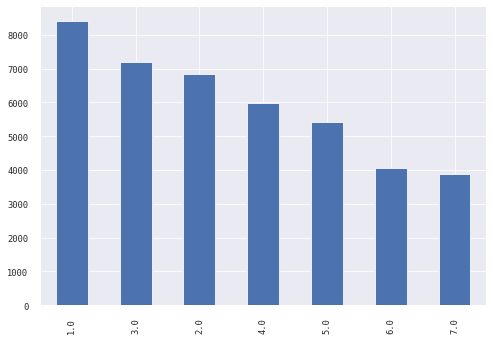

In [40]:
df1['Age in 5-year groups'].value_counts().plot(kind='bar');

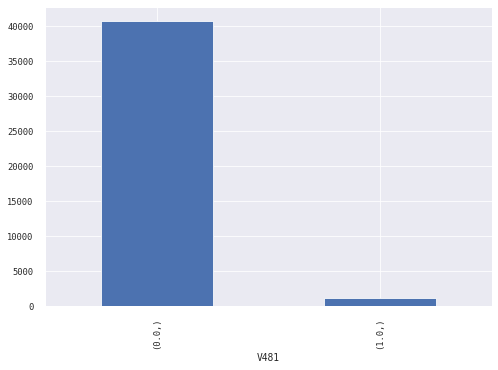

In [42]:
target.value_counts().plot(kind='bar');

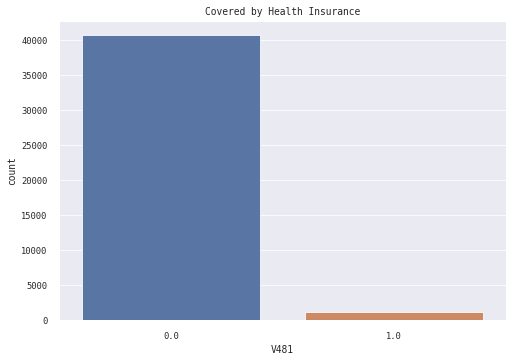

In [45]:
sns.countplot(x='V481', data=df)
plt.title('Covered by Health Insurance');